# Module 4 Project - Time-Series Analysis Using Zillow Data



# Objectives

The goal of this project is to provide consulting for a fictional real-estate investment firm. The question we will answer in conlusion of this research is 

> *What are the top 5 best zipcodes for the firm to invest in?* 

The data we will be working with comes from the Zillow Research Page. Specifically, we are going to look at zillow_data.csv. 


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
#import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
from pandas import Series
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#load the data set and view the first five rows
df = pd.read_csv("zillow_data.csv")
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [4]:
df.City.value_counts()

New York              114
Los Angeles            95
Houston                88
San Antonio            48
Washington             45
Chicago                41
Springfield            40
Austin                 40
Columbus               38
Las Vegas              38
Philadelphia           38
Phoenix                37
Kansas City            37
Dallas                 35
Portland               34
San Diego              33
Louisville             32
Denver                 30
Oklahoma City          30
Omaha                  30
Arlington              29
Jacksonville           28
San Jose               27
Richmond               27
Fort Worth             26
Indianapolis           26
Lexington              25
Charlotte              25
Lincoln                25
Madison                25
                     ... 
North Baltimore         1
Mt Vernon               1
Cement City             1
Torrington              1
Canal Fulton            1
Ignacio                 1
Rock Springs            1
Mt Holly    

The dataset features 14,723 zipcodes in 7,554 cities and the median house prices between April 1996 to April 2018. For the purposes of this research we will look into the zipcodes in Houston, TX. Houston is one of the fastest growing cities in the US. Every day, about 250 people move to Houston, and with the population of 2,325,502 people in 2018, it is projected to overtake Chicago as the 3rd largest city in the country.

In [5]:
#select the data for Houston and view the first 5 rows
df = df.loc[df['City'] == 'Houston']
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
44,91685,77036,Houston,TX,Houston,Harris,45,120400.0,118700.0,117300.0,...,174900,174600,175000,176000,177200,177700,177700,179800,185100,189800
63,91726,77077,Houston,TX,Houston,Harris,64,177100.0,180000.0,182700.0,...,309600,310000,310800,311600,311800,311200,310500,311400,313800,315900
182,91744,77095,Houston,TX,Houston,Harris,183,131700.0,131300.0,131100.0,...,208900,210200,210700,211200,212300,213100,212800,214300,217500,219600
279,91731,77082,Houston,TX,Houston,Harris,280,101600.0,101300.0,100800.0,...,165800,166600,167600,168400,169000,169800,170800,171800,172500,172900


In [6]:
#view the last 5 rows
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
8230,91681,77032,Houston,TX,Houston,Harris,8231,57100.0,57100.0,57000.0,...,104800,105600,106500,108200,111200,113600,115600,117400,118800,119200
8357,91743,77094,Houston,TX,Houston,Harris,8358,356300.0,357700.0,358800.0,...,375100,374400,374100,374700,375300,375000,373400,372800,373600,373900
8897,75034,38851,Houston,MS,NaN,Chickasaw,8898,NaN,NaN,NaN,...,74200,74500,74900,75300,76100,74400,72000,72000,73800,74000
11934,91699,77050,Houston,TX,Houston,Harris,11935,49200.0,49500.0,49700.0,...,104200,107000,109500,111200,110800,110900,112900,114900,115400,115200
14206,66105,19954,Houston,DE,Dover,Kent,14207,NaN,NaN,NaN,...,157000,156400,155700,154900,153200,152000,152500,153100,153200,153500


We can see that some of the lines present the data for Houston, MS and Houston, DE. Let's make sure we are only considering the data for Houston, TX.

In [7]:
#select the data for Houston, TX and view the first 5 rows
df = df.drop(df[(df['State'] != 'TX')].index)
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
44,91685,77036,Houston,TX,Houston,Harris,45,120400.0,118700.0,117300.0,...,174900,174600,175000,176000,177200,177700,177700,179800,185100,189800
63,91726,77077,Houston,TX,Houston,Harris,64,177100.0,180000.0,182700.0,...,309600,310000,310800,311600,311800,311200,310500,311400,313800,315900
182,91744,77095,Houston,TX,Houston,Harris,183,131700.0,131300.0,131100.0,...,208900,210200,210700,211200,212300,213100,212800,214300,217500,219600
279,91731,77082,Houston,TX,Houston,Harris,280,101600.0,101300.0,100800.0,...,165800,166600,167600,168400,169000,169800,170800,171800,172500,172900


In [8]:
#check the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 5 to 11934
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 183.4+ KB


In [9]:
#check for NaN values
df.isna().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
1996-04       0
1996-05       0
1996-06       0
1996-07       0
1996-08       0
1996-09       0
1996-10       0
1996-11       0
1996-12       0
1997-01       0
1997-02       0
1997-03       0
1997-04       0
1997-05       0
1997-06       0
1997-07       0
1997-08       0
1997-09       0
1997-10       0
1997-11       0
1997-12       0
1998-01       0
1998-02       0
             ..
2015-11       0
2015-12       0
2016-01       0
2016-02       0
2016-03       0
2016-04       0
2016-05       0
2016-06       0
2016-07       0
2016-08       0
2016-09       0
2016-10       0
2016-11       0
2016-12       0
2017-01       0
2017-02       0
2017-03       0
2017-04       0
2017-05       0
2017-06       0
2017-07       0
2017-08       0
2017-09       0
2017-10       0
2017-11       0
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int6

We now have a table featuring 86 zipcodes in Houston, TX. The table does not contain NaN values. Let's select the top 5 zipcodes based on the highest return on investment (ROI) and lowest risk (coefficient of variance).

In [10]:
#calculate ROI
df['ROI'] = ((df['2018-04']-df['1996-04'])/df['1996-04'])
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,158700,160200,161900,162800,162800,162800,162900,163500,164300,0.729474
44,91685,77036,Houston,TX,Houston,Harris,45,120400.0,118700.0,117300.0,...,174600,175000,176000,177200,177700,177700,179800,185100,189800,0.576412
63,91726,77077,Houston,TX,Houston,Harris,64,177100.0,180000.0,182700.0,...,310000,310800,311600,311800,311200,310500,311400,313800,315900,0.783738
182,91744,77095,Houston,TX,Houston,Harris,183,131700.0,131300.0,131100.0,...,210200,210700,211200,212300,213100,212800,214300,217500,219600,0.667426
279,91731,77082,Houston,TX,Houston,Harris,280,101600.0,101300.0,100800.0,...,166600,167600,168400,169000,169800,170800,171800,172500,172900,0.701772


In [11]:
#calculate standard deviation of monthly values
df['std'] = df.loc[:,'1996-04':'2018-04'].std(skipna=True, axis=1)
#calculate mean values
df['mean'] = df.loc[:,'1996-04':'2018-04'].mean(skipna=True, axis=1)
#calculate coefficient of variance
df['Risk'] = df['std']/df['mean']
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,Risk
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,162800,162800,162800,162900,163500,164300,0.729474,17242.109812,121185.283019,0.142279
44,91685,77036,Houston,TX,Houston,Harris,45,120400.0,118700.0,117300.0,...,177200,177700,177700,179800,185100,189800,0.576412,16512.621894,130520.000000,0.126514
63,91726,77077,Houston,TX,Houston,Harris,64,177100.0,180000.0,182700.0,...,311800,311200,310500,311400,313800,315900,0.783738,38956.427551,221867.924528,0.175584
182,91744,77095,Houston,TX,Houston,Harris,183,131700.0,131300.0,131100.0,...,212300,213100,212800,214300,217500,219600,0.667426,22567.238470,160135.471698,0.140926
279,91731,77082,Houston,TX,Houston,Harris,280,101600.0,101300.0,100800.0,...,169000,169800,170800,171800,172500,172900,0.701772,17913.073593,124269.056604,0.144147


In [12]:
#get the 5 zipcodes with highest ROI and the lowest risk - variation below 50
df_risk = df.Risk.quantile(.6)
df = df[df['Risk'] < df_risk].sort_values('ROI',axis=0,ascending=False)[:5]
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,Risk
8230,91681,77032,Houston,TX,Houston,Harris,8231,57100.0,57100.0,57000.0,...,111200,113600,115600,117400,118800,119200,1.087566,12932.359633,79567.169811,0.162534
1028,91664,77015,Houston,TX,Houston,Harris,1029,66100.0,66100.0,66200.0,...,128500,129700,130400,131400,133000,134100,1.028744,15294.285117,91005.660377,0.168059
3056,91724,77075,Houston,TX,Houston,Harris,3057,85100.0,84800.0,84500.0,...,162500,164100,165100,165900,166800,167200,0.964747,19069.972962,114387.924528,0.166713
1146,91738,77089,Houston,TX,Houston,Harris,1147,91400.0,91400.0,91400.0,...,172500,173700,174900,176200,177700,178800,0.956236,20305.340267,121317.735849,0.167373
1317,91748,77099,Houston,TX,Houston,Harris,1318,72100.0,72100.0,72200.0,...,131100,132100,132400,134000,137400,140100,0.943135,16456.976238,96718.867925,0.170153


Now that we have our top 5 zipcodes in terms of high ROI and low risk, we are ready to reshape our dataframe from wide to long format.

<img src='HOU Zip.png'>

## Step 2: Reshape from Wide to Long Format

## Wide Format vs Long Format

If we take a look at the format of the data in `zillow_data.csv`, we'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

We notice that the first seven columns look like any other dataset we're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if we know the name of the column that the data can be found in. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like this:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset: one for each unique time and zipcode combination in the data. Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

In [13]:
#remove unnecessary columns before melting the data
df.drop('RegionID', axis=1, inplace=True)
df.drop('ROI', axis=1, inplace=True)
df.drop('std', axis=1, inplace=True)
df.drop('mean', axis=1, inplace=True)
df.drop('Risk', axis=1, inplace=True)
df

,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
8230,77032,Houston,TX,Houston,Harris,8231,57100.0,57100.0,57000.0,57000.0,...,104800,105600,106500,108200,111200,113600,115600,117400,118800,119200
1028,77015,Houston,TX,Houston,Harris,1029,66100.0,66100.0,66200.0,66300.0,...,125500,125900,126200,127100,128500,129700,130400,131400,133000,134100
3056,77075,Houston,TX,Houston,Harris,3057,85100.0,84800.0,84500.0,84400.0,...,154700,156000,157800,160200,162500,164100,165100,165900,166800,167200
1146,77089,Houston,TX,Houston,Harris,1147,91400.0,91400.0,91400.0,91300.0,...,168300,169400,170300,171300,172500,173700,174900,176200,177700,178800
1317,77099,Houston,TX,Houston,Harris,1318,72100.0,72100.0,72200.0,72200.0,...,128500,129100,129500,130300,131100,132100,132400,134000,137400,140100


In [14]:
#write a function to melt the data
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [15]:
#write a function to merge the melted data into a new dataframe
def melt_df(df):
    merged = []
    for zipcode in df.RegionName:
        melted = melt_data(df.loc[df['RegionName'] == zipcode])
        row = df.loc[df['RegionName'] == zipcode].iloc[:,:6]
        rows = pd.concat([row]*len(melted), ignore_index=True)
        merge = pd.concat([rows, melted.reset_index()], axis= 1)
        merged.append(merge)
    melted_df = pd.concat(merged)
    return melted_df

In [16]:
#reshape from wide to long format and view the first 5 rows
df = melt_df(df)
df.head()

,RegionName,City,State,Metro,CountyName,SizeRank,time,value
0,77032,Houston,TX,Houston,Harris,8231,1996-04-01,57100.0
1,77032,Houston,TX,Houston,Harris,8231,1996-05-01,57100.0
2,77032,Houston,TX,Houston,Harris,8231,1996-06-01,57000.0
3,77032,Houston,TX,Houston,Harris,8231,1996-07-01,57000.0
4,77032,Houston,TX,Houston,Harris,8231,1996-08-01,57000.0


# Step 3: Data Preprocessing

Now that we melted our data and reshaped the dataframe from wide to long format, we need to make sure that the dates are in the correct format and set as index.

In [17]:
#convert time to a datetime column
df.time = pd.to_datetime(df.time, format='%m/%y')

In [18]:
#make time the index column and view the first 5 rows
df.set_index('time', inplace = True)
df.head()

,RegionName,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,
1996-04-01,77032,Houston,TX,Houston,Harris,8231,57100.0
1996-05-01,77032,Houston,TX,Houston,Harris,8231,57100.0
1996-06-01,77032,Houston,TX,Houston,Harris,8231,57000.0
1996-07-01,77032,Houston,TX,Houston,Harris,8231,57000.0
1996-08-01,77032,Houston,TX,Houston,Harris,8231,57000.0


In [19]:
#check the dataframe info to make sure the format is accurate
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1325 entries, 1996-04-01 to 2018-04-01
Data columns (total 7 columns):
RegionName    1325 non-null int64
City          1325 non-null object
State         1325 non-null object
Metro         1325 non-null object
CountyName    1325 non-null object
SizeRank      1325 non-null int64
value         1325 non-null float64
dtypes: float64(1), int64(2), object(4)
memory usage: 82.8+ KB


# Step 4: EDA and Visualization

Let's visualize our findings and see what we can find out from our data.

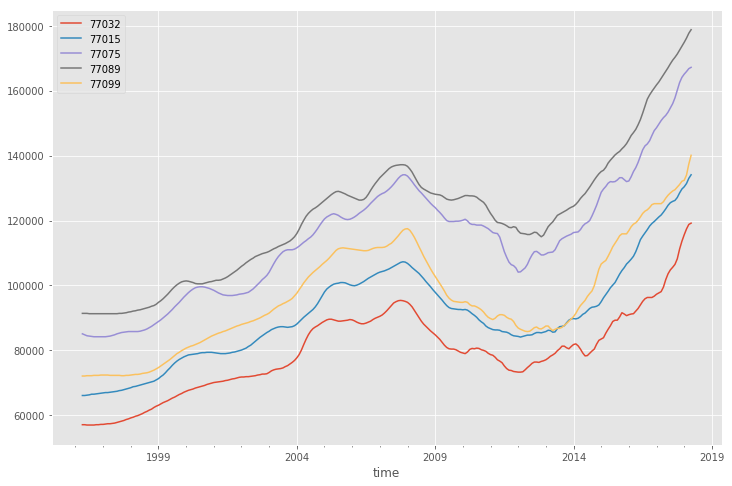

In [20]:
#plot the values grouped by zipcode
plt.figure(figsize=(12,8))
for zipcode in df.RegionName.unique():
    df.loc[df['RegionName'] == zipcode].value.plot(label=zipcode)
plt.legend()
plt.show()

From the graph, we can observe the burst of a housing bubble in 2008. Out of our 5 selected zipcodes, 77089 has the highest prices and 77032 the lowest.

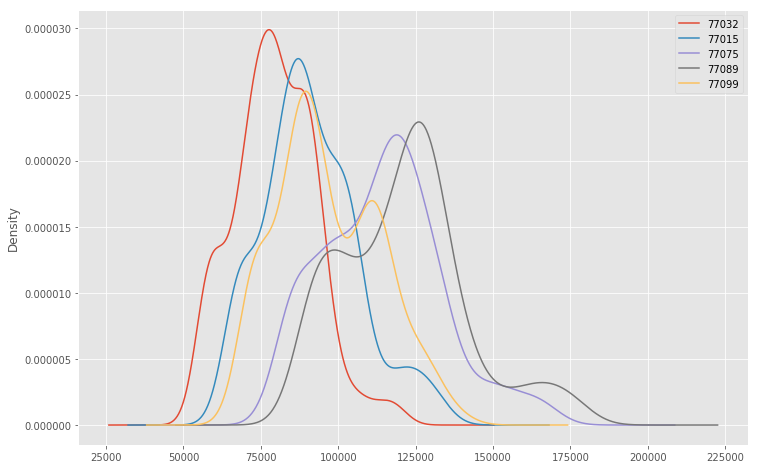

In [21]:
#create a time-series density plot
plt.figure(figsize=(12,8))
for zipcode in df.RegionName.unique():
    df.loc[df['RegionName'] == zipcode].value.plot(kind = 'kde', label=zipcode)
plt.legend()
plt.show()

From the density plot we can see a summary of the distribution of observations. All distributions are asymmetrical and have some skewness, i.e. are not purely Gaussian.

Let's now select 1 zipcode and dive deeper into seasonality and trends.

In [22]:
#create a new dataframe containing 1 zipcode 
df1 = df.loc[df['RegionName'] == 77089]
df1.head()

,RegionName,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,
1996-04-01,77089,Houston,TX,Houston,Harris,1147,91400.0
1996-05-01,77089,Houston,TX,Houston,Harris,1147,91400.0
1996-06-01,77089,Houston,TX,Houston,Harris,1147,91400.0
1996-07-01,77089,Houston,TX,Houston,Harris,1147,91300.0
1996-08-01,77089,Houston,TX,Houston,Harris,1147,91300.0


In [23]:
#drop unnecessary columns
df1.drop('RegionName', axis=1, inplace=True)
df1.drop('City', axis=1, inplace=True)
df1.drop('State', axis=1, inplace=True)
df1.drop('Metro', axis=1, inplace=True)
df1.drop('CountyName', axis=1, inplace=True)
df1.drop('SizeRank', axis=1, inplace=True)
df1.head()

,value
time,
1996-04-01,91400.0
1996-05-01,91400.0
1996-06-01,91400.0
1996-07-01,91300.0
1996-08-01,91300.0


To understand our time-series further, we are going to use a mathematical procedure called decomposing which transforms a time-series into 3 components. It helps us understand seasonal patterns, an underlying trend, and the randomness, i.e. residuals after seasonality and trend are removed.

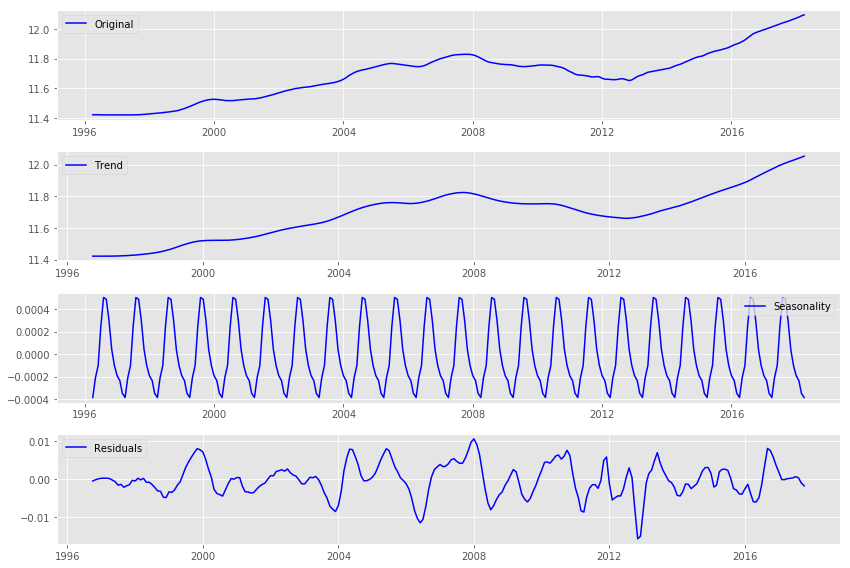

In [24]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(df1))

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(df1), label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

From the above graphs, we can see that the trend goes upwards, i.e. the houses in this zipcode became more expensive over time, with a dip after 2008. 

As for seasonality, we can see a clear pattern of house values going up in the summer. This is because summer is a prime season for sellers/buyers: most people are waiting for the school year to end before they move, and they try to move in before the school year starts. At the same time, the house values are lowest during the holidays, because people don't want to add moving to family obligations, vacation and end-of-year work commitments.

Now let's check for stationarity on residuals.

In [25]:
#perform the check_stationarity function
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['value']) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

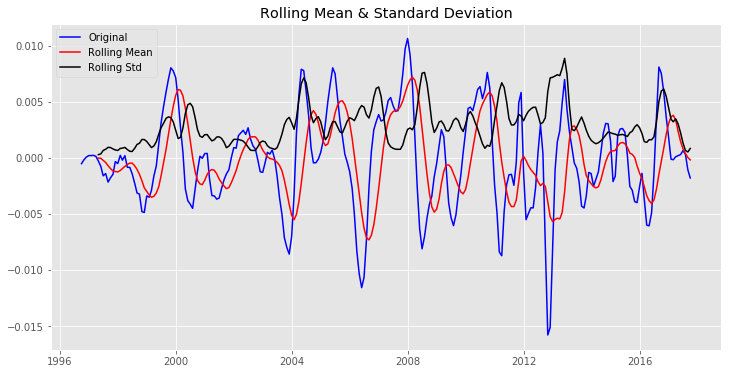

Results of Dickey-Fuller Test:
Test Statistic                -5.812020e+00
p-value                        4.378951e-07
#Lags Used                     1.300000e+01
Number of Observations Used    2.390000e+02
Critical Value (1%)           -3.458011e+00
Critical Value (5%)           -2.873710e+00
Critical Value (10%)          -2.573256e+00
dtype: float64


In [26]:
# Drop NaN values from residuals.
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

# Check stationarity
stationarity_check(ts_log_decompose)

The Dickey-Fuller test statistic is below 0.01 mark, so we proceed under the assumption that this time series is stationary.

# Step 5: ARIMA Modeling

Working with time series we can predict future house values based on the past values. In this project we will forecast using ARIMA model (AutoRegressive Integrated Moving Averages). The assumptions of ARIMA model are that there is no seasonality and that detrending has already been performed. 

In case there is seasonality involved in the dataset, we can defer to SARIMA model (Seasonal ARIMA).

The predictors will be dependent on the parameters of the ARIMA model
* P is the autoregressive part of the model
* D is the integrated component.
* Q is the moving average part.

To fit an ARIMA model, we first need to find the values of P, D, Q to produce the desired output. 

In [27]:
#define the p, d and q parameters to take any value between 0 and 2
P = D = Q = range(0, 2)

#generate all different combinations of p, q and q triplets
PDQ = list(itertools.product(P, D, Q))

#generate all different combinations of seasonal p, q and q triplets
PDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

To evaluate the model, the AIC (Akaike Information Criterion) is used. AIC estimates the relative quality of statistical models and can be defined using statsmodels library. This means that AIC can help us select the best model.

In [28]:
#run a grid with PDQ and seasonal PDQ parameters calculated above and get the best AIC value
ans = []
for comb in PDQ:
    for combs in PDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(df1,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =6939.7710140052295
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =6463.860185843989
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =5199.235846437074


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py

ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =4961.086818456908
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =5129.680035384867
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =5111.274170002488
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =4849.710390566055


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =4826.926310836063
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =6723.504932523468
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =6373.73274237588


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =5147.966043295403


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =6537.968888089181
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =6776.944411509388


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =6354.642728049837


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =4773.108146828818


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =5903.410677828586
ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =4190.139910984884
ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =3969.146972374294


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =4006.4965495244815


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =3767.206528376032
ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =3963.066195188454


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =3941.9801677141268
ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =3777.408309011007


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =3760.8878047460794
ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =3883.0112264065133


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =3682.8006250840986
ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =3820.2044695394584


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =3500.752595783918


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =3741.6633728091974


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =3658.279526675629


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =3590.0043384775613


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =3499.6688886389347
ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =4122.76845244474


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =3929.4871724068717
ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =4023.267828463018


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/

ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =3851.630851562468
ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =3922.946077742513
ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =4008.054543854575
ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =3781.6116864763953


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =3786.566581052881
ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =3898.733502811239


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =3721.0696739906607
ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =3919.3445596433503


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =3524.6036804553096


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =3739.2399717815106


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =3742.4715437986624


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =3596.250200649495


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =3643.8570035795274
ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =3579.4871912952094
ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =3406.626860156006
ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =3649.055326410276


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =3401.778001046544
ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =3411.4693791257296


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =3407.1707822311328


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =3390.7476091232065


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =3384.62171083214
ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =3519.7412982480273


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =3355.0480887296417
ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =3588.010863706501


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =3262.7896958635215
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =3380.78557901367


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =3354.879331494958


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =3373.050150353912


/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =3333.8031427251053


In [29]:
#find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['PDQ', 'PDQs', 'AIC'])
ans_df.loc[ans_df['AIC'].idxmin()]

PDQ         (1, 1, 1)
PDQs    (0, 1, 1, 12)
AIC           3262.79
Name: 59, dtype: object

The lowest AIC value of 3262.79 is produced by the combination of (1,1,1)x(0,1,1,12). That is why we will select the above model to proceed further.

In [30]:
#put the optimal parameters into the SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df1,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8814      0.026     33.973      0.000       0.831       0.932
ma.L1          0.5065      0.047     10.714      0.000       0.414       0.599
ma.S.L12      -0.9987      2.335     -0.428      0.669      -5.576       3.579
sigma2      3.838e+04   8.98e+04      0.427      0.669   -1.38e+05    2.14e+05


The coefficients in the table above show the importance of each feature and P-values indicate the significance. Some of the P-values are much higher than 0.05 which signify that there might be an error in our calculations.

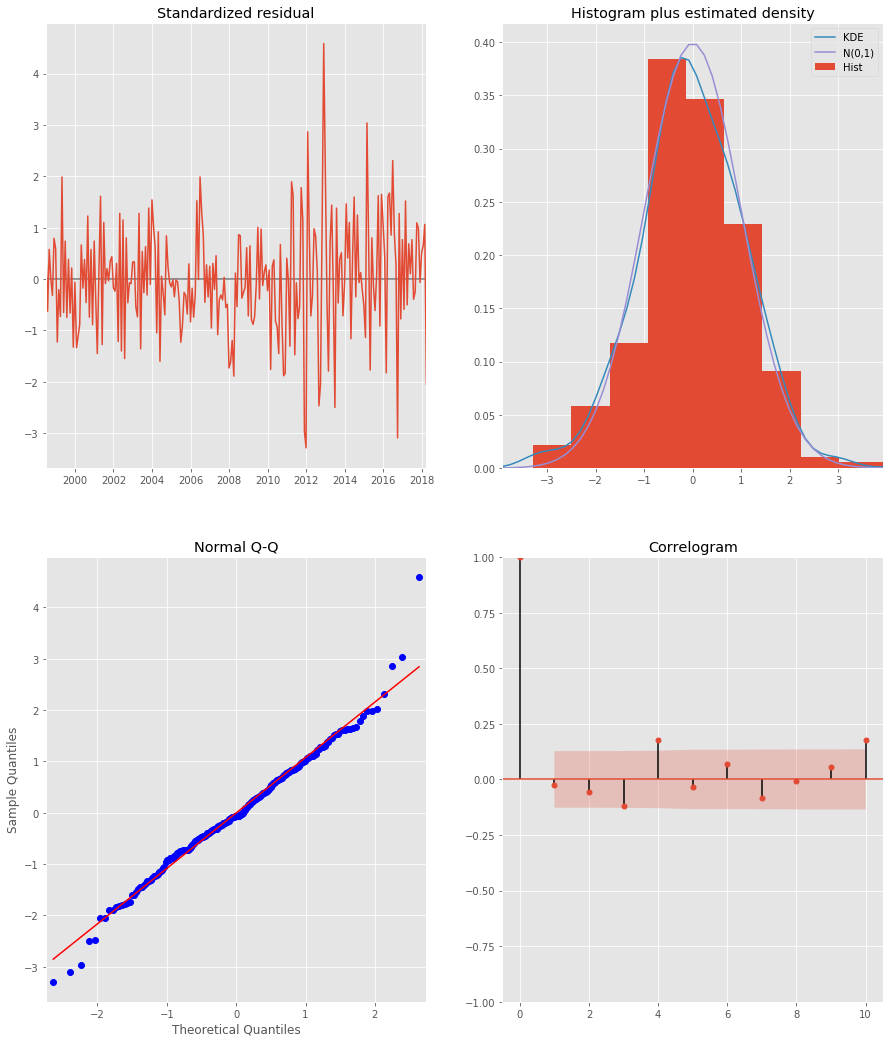

In [31]:
#use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()

Our goal is to make sure that residuals are uncorrelated, normally distributed and have zero mean. 

Based on the histogram and the fact that the KDE line follows the N(0,1) line pretty closely, we conclude that the residuals are normally distributed.

In the qq-plot, the residuals follow the linear trend, which shows they are normally distributed.

The residuals over time look like white noise and do not show any obvious seasonality.

The correlogram shows that residuals have some correlation with lagged version of themselves.

To understand the accuracy of the forecast and validate the model, we need to compare the actual time series values to the predicted values. In this research we will use one-step ahead forecasts which means we'll be using full history to generate predictions, i.e. the forecast is not dynamic.

In [32]:
#get predictions starting from 2016-01-01 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()

Let's plot the real values, the forecasted values and the confidence interval.

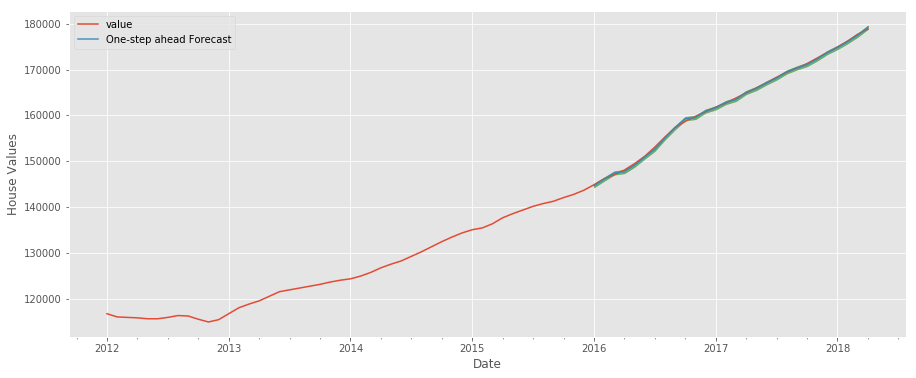

In [33]:
#plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6

#plot observed values
ax = df1['2012-01-01':].plot(label='observed')

#plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('House Values')
plt.legend()

plt.show()

The forecast is aligned with the actuals. To check for accuracy, we are going to calculate Mean Squared Error (MSE).

In [34]:
#get the real and predicted values
df1_forecasted = pred.predicted_mean
df1_truth = df1['2016-01-01':].value

#compute the mean square error
mse = ((df1_forecasted - df1_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 59994.01


The mean squared error is significant. Let's go back to our model and check for the second lowest AIC value.

In [35]:
#put the optimal parameters into the SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df1,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8445      0.033     25.541      0.000       0.780       0.909
ma.L1          0.3781      0.024     16.066      0.000       0.332       0.424
ar.S.L12      -0.5791      0.048    -12.058      0.000      -0.673      -0.485
ma.S.L12      -0.0977      0.020     -4.794      0.000      -0.138      -0.058
sigma2        6.2e+04   3929.503     15.777      0.000    5.43e+04    6.97e+04


This time all P-values are below 0.05 which is a good sign. Let's proceed with diagnostics.

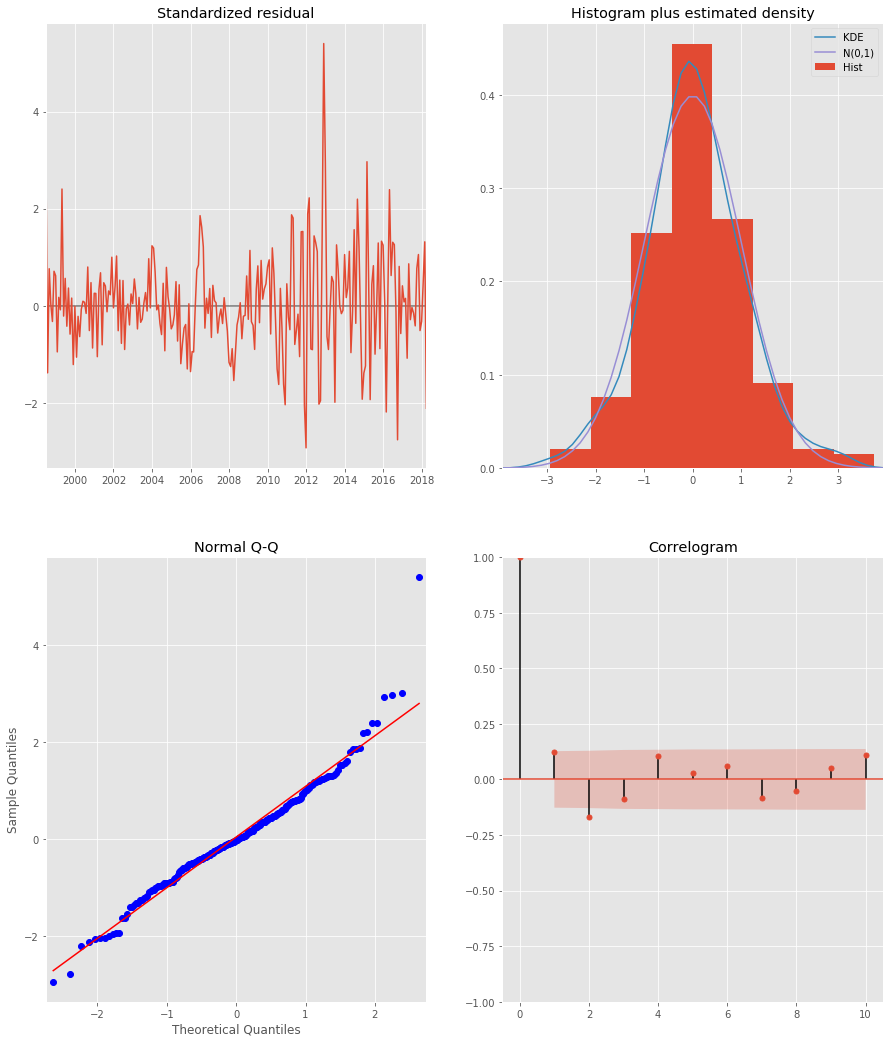

In [36]:
#use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()

With the second model, KDE is on point, showing a normal distribution with mean 0 and deviation of 1. The correlogram demonstrates low correlation between residuals.

Let's move on to predictions.

In [37]:
#get predictions starting from 2016-01-01 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()

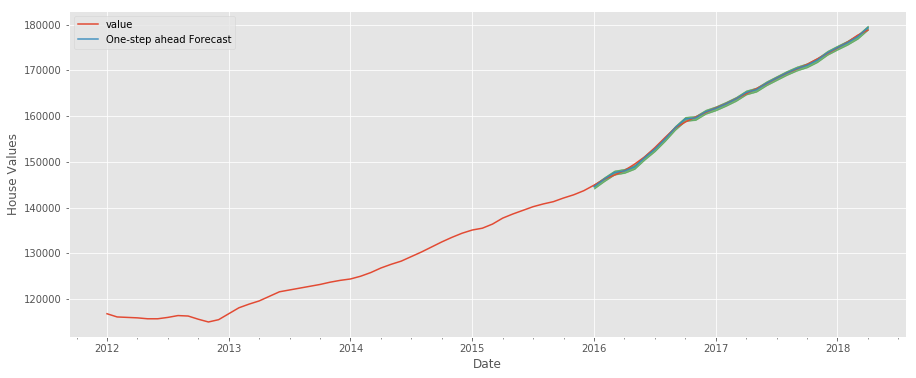

In [38]:
#plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6

#plot observed values
ax = df1['2012-01-01':].plot(label='observed')

#plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('House Values')
plt.legend()

plt.show()

In [39]:
#get the real and predicted values
df1_forecasted = pred.predicted_mean
df1_truth = df1['2016-01-01':].value

#compute the mean square error
mse = ((df1_forecasted - df1_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 78461.88


Let's try once again.

In [40]:
#put the optimal parameters into the SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df1,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9521      0.020     46.771      0.000       0.912       0.992
ma.L1          0.4467      0.057      7.826      0.000       0.335       0.559
ar.S.L12       0.2245      0.162      1.386      0.166      -0.093       0.542
ma.S.L12      -0.4947      0.153     -3.223      0.001      -0.796      -0.194
sigma2       3.75e+04   2693.910     13.919      0.000    3.22e+04    4.28e+04


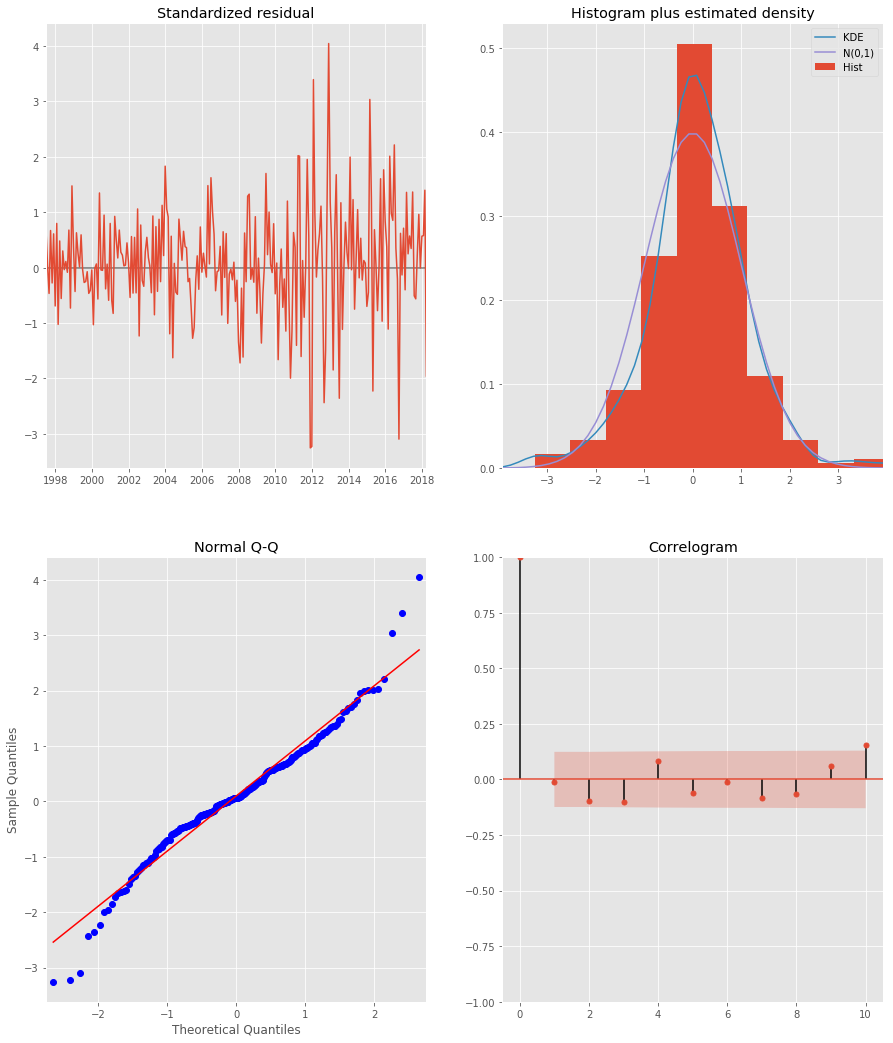

In [41]:
#use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [42]:
#get predictions starting from 2016-01-01 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()

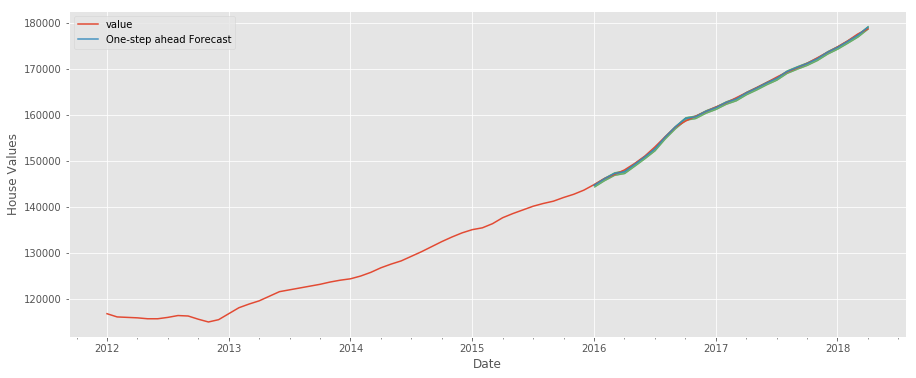

In [43]:
#plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6

#plot observed values
ax = df1['2012-01-01':].plot(label='observed')

#plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('House Values')
plt.legend()

plt.show()

In [44]:
#get the real and predicted values
df1_forecasted = pred.predicted_mean
df1_truth = df1['2016-01-01':].value

#compute the mean square error
mse = ((df1_forecasted - df1_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 47884.37


This is the lowest mean squared error out of our 3 models. Let's use this model to make predictions.

In [45]:
#get forecast 50 steps ahead in future
prediction = output.get_forecast(steps=50)

#get confidence intervals of forecasts
pred_conf = prediction.conf_int()

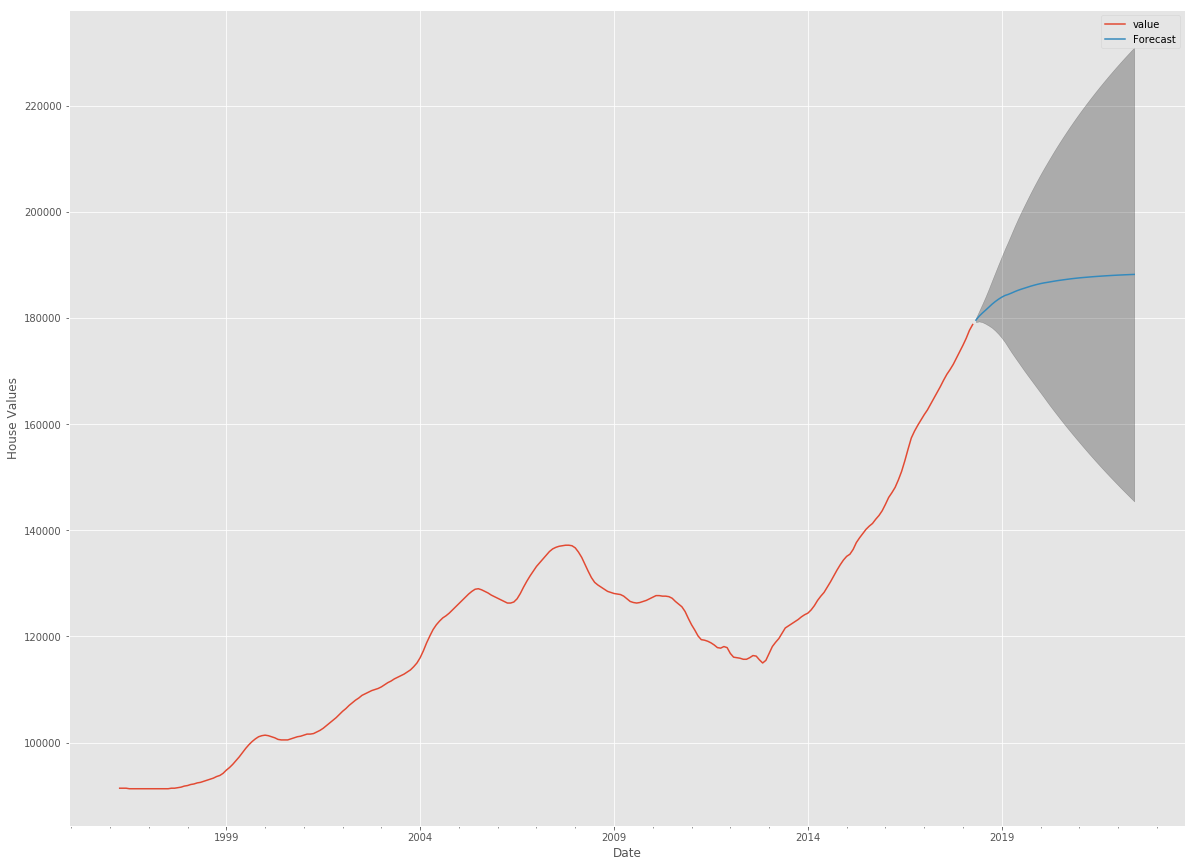

In [46]:
#plot future predictions with confidence intervals

ax = df1.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('House Values')

plt.legend()
plt.show()

# Step 6: Interpreting Results

Based on what we learned from the P values, model diagnostics and mean squared error, we've selected the 3rd model (combination of (1,1,1)x(1,0,1,12). Based on this model, our prediction for the next 50 years in zipcode 77089 is that the housing prices will continue to grow and will get close to 190,000. 